           Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
Store ID                                                                 
1                1659             1961                   530        66490
2                1461             1752                   210        39820
3                1340             1609                   720        54010
4                1451             1748                   620        53730
5                1770             2111                   450        46620
...               ...              ...                   ...          ...
892              1582             1910                  1080        66390
893              1387             1663                   850        82080
894              1200             1436                  1060        76440
895              1299             1560                   770        96610
896              1174             1429                  1110        54340

[896 rows x 4 columns] 



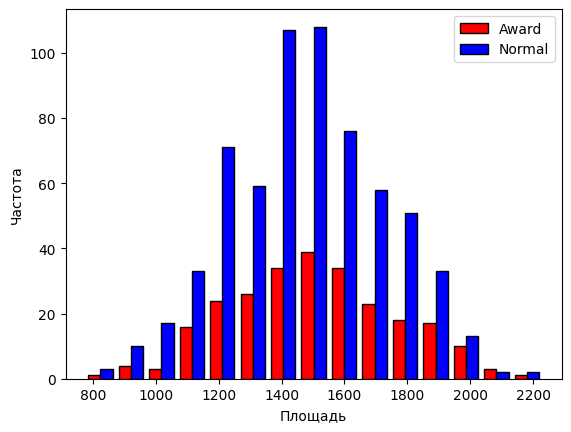

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("data/Stores.csv", index_col="Store ID ")

print(df, "\n")

df["Gr"] = df["Store_Sales"].apply(lambda x: "Award" if x > 70000 else "Normal")

award_data = list(df[df["Gr"] == "Award"]["Store_Area"])
normal_data = list(df[df["Gr"] == "Normal"]["Store_Area"])

colors = ['red', 'blue']
names = ["Award","Normal"]

plt.hist([award_data, normal_data], bins=15, edgecolor="black", color=colors,label=names)
plt.legend()
plt.xlabel("Площадь")
plt.ylabel("Частота")
plt.show()


<h3>Гистограмма "Распределение Store_Area"</h3>

Данная гистограмма позваляет оценить связь между площадью магазина и его продажами. Award - магазины с более высокой выручкой, Normal - все остальные. Если бы большинство магазинов из категории "Award" находилось в правой части графика, то это означала, что прибыль напрямую магазина зависит от его площади. Исходя из полученного графика, видно, что такой явной корреляции нет.

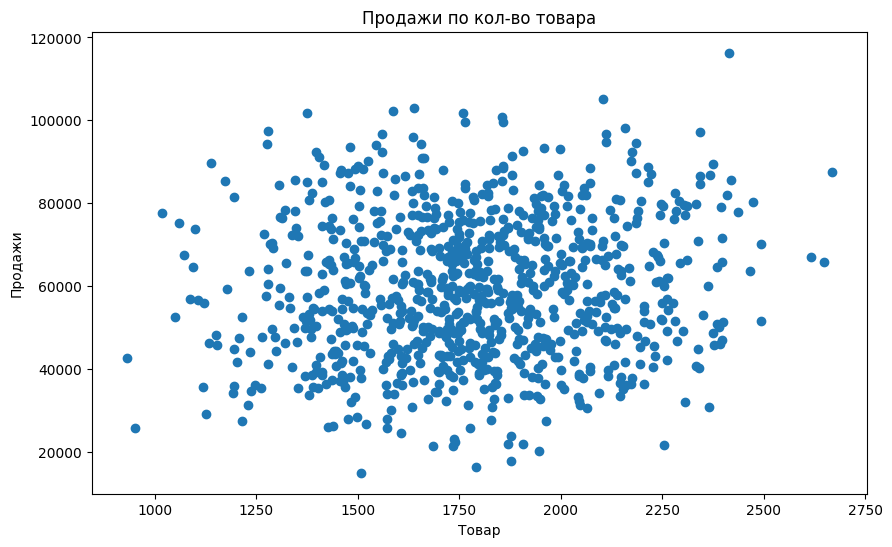

In [47]:
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния между площадью магазина и продажами
plt.scatter(df['Items_Available'], df['Store_Sales'])
plt.xlabel('Товар')
plt.ylabel('Продажи')
plt.title('Продажи по кол-во товара')
plt.show()


<h3>Диаграмма рассеяния</h3>

Данная диаграмма отображает зависимость между количеством товара в магазине и его продажами. На диаграмме точки не выстраиваются в ряд, что позволяет сделать вывод о том, что между количеством товара и продажами нет явной связи.

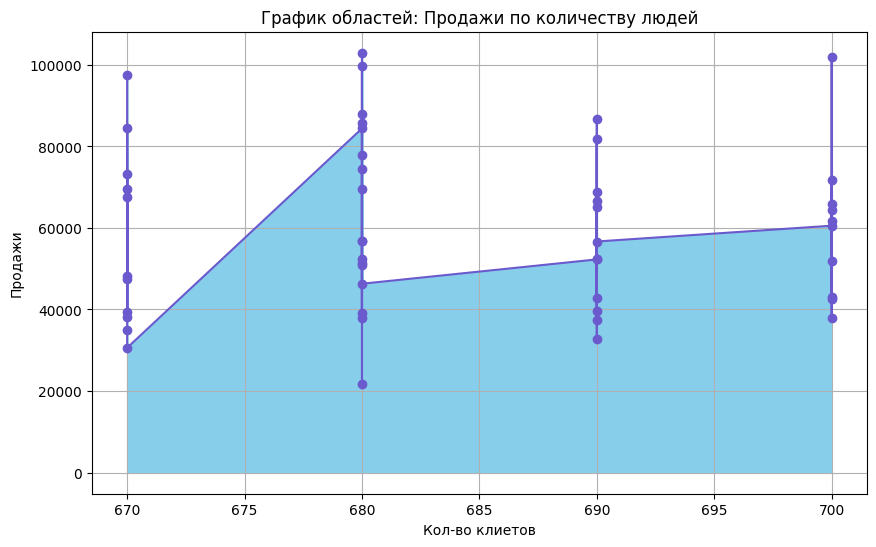

In [48]:
# Построение графика областей для продаж по площади магазина
plt.figure(figsize=(10, 6))

df_sorted = df.sort_values('Daily_Customer_Count')

df_filter = df_sorted.iloc[300:350]

plt.fill_between(df_filter['Daily_Customer_Count'], df_filter['Store_Sales'], color='skyblue')
plt.plot(df_filter['Daily_Customer_Count'], df_filter['Store_Sales'], marker='o', color='Slateblue')
plt.xlabel('Кол-во клиетов')
plt.ylabel('Продажи')
plt.title('График областей: Продажи по количеству людей')
plt.grid(True)
plt.show()

<h3>График областей</h3>

Данная диаграмма отображает зависимость между количеством клиентов и продажами. Для посторение данной диаграммы используется срез данных. Как итог, как и в прошлых диаграммах кол-во людей на прямую не влияет на продажи магазина.